In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

%matplotlib inline
#plt.style.use('ggplot')

In [2]:
# Indicadores de Riesgo sistemico
# Dow Jones Industrial Average index, indicador del sistema financiero global
dow = pd.read_csv('data_quandl/dow.csv', index_col=0, parse_dates=True)
# West Texas Intermediate, precio del petróleo indicador base costos de producir bienes, indicador inflación global
wti = pd.read_csv('data_quandl/wti.csv', index_col=0, parse_dates=True)
# Effective Federal Funds Rate, indicador base del costo de financiamiento global
fedrate = pd.read_csv('data_quandl/fedrate.csv', index_col=0, parse_dates=True)
# Monetary Base; Total, indicador base del costo de exportaciones e importaciones.
money = pd.read_csv('data_quandl/money.csv', index_col=0, parse_dates=True)
# Total Public Debt as Percent of Gross Domestic Product, nivel de Deuda del emisor de dolares 
debt = pd.read_csv('data_quandl/debt.csv', index_col=0, parse_dates=True)
# Indicador local tipo de cambio Pesos Chilenos a Dolar Estados Unidos.
usdclp = pd.read_csv('data_quandl/usdclp.csv', index_col=0, parse_dates=True)

# Observaciones:
# La economía global tiene aceledadores y frenos que manipulan los ciclos económicos
# estos no generan los ciclos, pero si son capaces de amplificar o reducir su efecto.
# En esto USA tiene un rol muy relevante:
# Aceleradores:
#   - Bajar tasa de interes
#   - Emitir dolares
# Desde la crisis del 2008 el acelerador ha estado a tope y es inminente que la
# economía global empiece un ciclo de corrección.
# Razones por la cuales "el acelerador" no ha generado inflación excesiva en USA, es por la
# irrupción del shale oil y shale gas, que permitiero a USA internalizar una salida de dólares muy importantes
# por concepto de importación de petróleo.
# La excesiva emisión de dólares fue directamente al mercado financiero y está altamente concentrado en pocos agentes
# que lo utilizan como musculo financiero, sin llegar a los consumidores que podrían hacer sucir los precios.

In [3]:
df = pd.DataFrame()
df['dow'] = dow.Value
df['wti'] = wti.Value
df['fed'] = fedrate.FEDFUNDS.resample('D').bfill()
df['usdclp'] = usdclp.Rate
df['money'] = money.BOGMBASEW.resample('D').bfill()
df['debt'] = debt.GFDEGDQ188S.resample('D').bfill()
year = datetime.now().year
init = str(year - 13)
df = df.loc[init:]

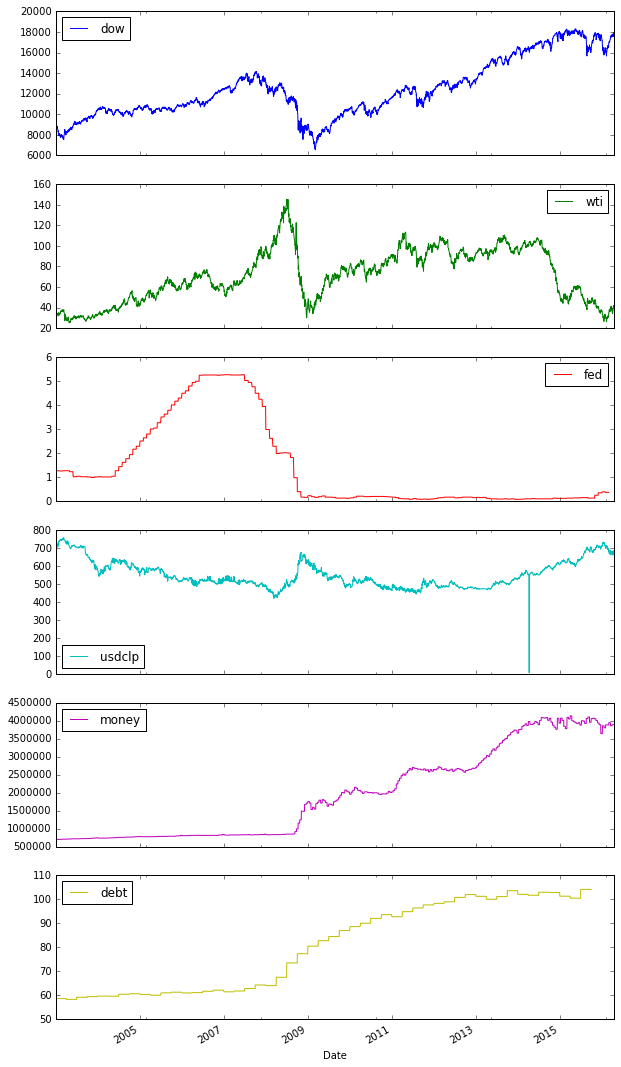

In [4]:
df.plot(subplots=True, figsize=(10, 20), sharex=True)
plt.savefig('result/SystemicRisk.png')

In [5]:
#%qtconsole